Import the necessary packages

In [2]:
import matplotlib
matplotlib.use("Agg")
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from minivggnet import MiniVGGNet
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


Using TensorFlow backend.


Step decay to drop learnging rate by a given facotry every X (dropEvery) epochs

In [3]:
def step_decay(epoch):
	
	initAlpha = 0.01
	factor = 0.25
	dropEvery = 5

	# learing rate for current epoch
	alpha = initAlpha * (factor ** np.floor((1 + epoch) / dropEvery))

	# return the learning rate
	return float(alpha)

load cifar10 data and normalize

In [4]:
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

create label vector

In [5]:

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

label names

In [6]:

labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]


training model call backs

In [7]:

callbacks = [LearningRateScheduler(step_decay)]


define model

In [8]:

opt = SGD(lr=0.01, momentum=0.9, nesterov=True)
model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

train the model

In [9]:

H = model.fit(trainX, trainY, validation_data=(testX, testY),
	batch_size=64, epochs=40, callbacks=callbacks, verbose=1)


Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 23s 466us/step - loss: 1.6269 - acc: 0.4602 - val_loss: 1.2617 - val_acc: 0.5742
Epoch 2/40
50000/50000 [==============================] - 21s 426us/step - loss: 1.1569 - acc: 0.6049 - val_loss: 0.9888 - val_acc: 0.6538
Epoch 3/40
50000/50000 [==============================] - 22s 431us/step - loss: 0.9832 - acc: 0.6581 - val_loss: 0.8349 - val_acc: 0.7031
Epoch 4/40
50000/50000 [==============================] - 22s 441us/step - loss: 0.8730 - acc: 0.6965 - val_loss: 0.8641 - val_acc: 0.7025
Epoch 5/40
50000/50000 [==============================] - 22s 442us/step - loss: 0.7271 - acc: 0.7456 - val_loss: 0.6555 - val_acc: 0.7695
Epoch 6/40
50000/50000 [==============================] - 23s 451us/step - loss: 0.6793 - acc: 0.7600 - val_loss: 0.6546 - val_acc: 0.7718
Epoch 7/40
50000/50000 [==============================] - 23s 451us/step - loss: 0.6552 - acc: 0.7690 - val_loss: 0.

test model

In [10]:
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

             precision    recall  f1-score   support

   airplane       0.84      0.78      0.81      1000
 automobile       0.93      0.87      0.90      1000
       bird       0.75      0.66      0.70      1000
        cat       0.61      0.63      0.62      1000
       deer       0.73      0.78      0.75      1000
        dog       0.70      0.71      0.71      1000
       frog       0.81      0.88      0.84      1000
      horse       0.86      0.83      0.85      1000
       ship       0.87      0.91      0.89      1000
      truck       0.86      0.90      0.88      1000

avg / total       0.80      0.80      0.80     10000



In [17]:
import matplotlib.pyplot as plt
%matplotlib inline  

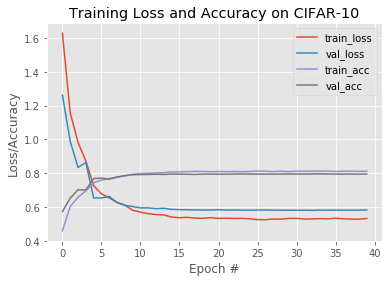

In [18]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()